<a href="https://colab.research.google.com/github/diazariana/CH_DataAnalytics/blob/main/Visualizacion%2BDiaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Python/Visualizaciones'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Python/Visualizaciones


In [ ]:
df=pd.read_csv("HRDataset_v14.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
#1)Realizar estadísticas descriptivas básicas
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


Text(0, 0.5, 'Empleados')

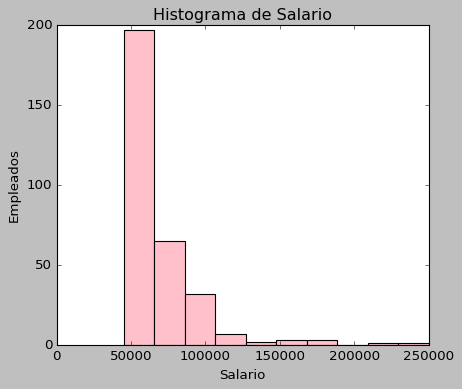

In [ ]:
#2) Relizar histograma de salarios. Que rangos de salarios son los mas populares?
mpl.style.use('classic')
fig, ax=plt.subplots(figsize =(6, 5))
ax.hist(x= df.Salary, density=False, orientation='vertical', color='pink')
ax.set_title('Histograma de Salario')
ax.set_xlabel('Salario')
ax.set_ylabel('Empleados')

Text(0, 0.5, 'Empleados')

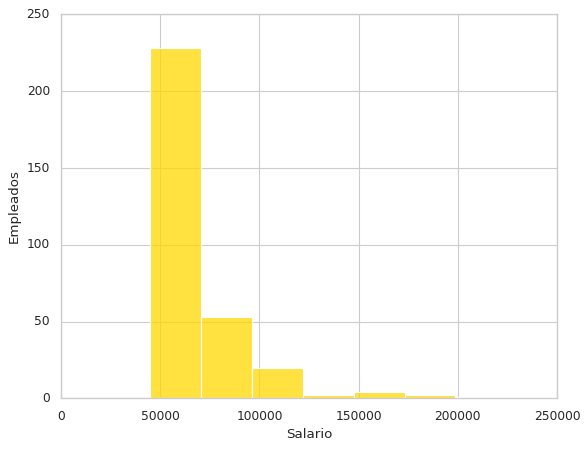

In [ ]:
#Otra forma con Seaborn
sns.set_theme(style="whitegrid")
sns.set_style(rc={"axes.grid": True})
sns.histplot(data=df, x="Salary", bins=8, color='gold')
plt.xlabel("Salario")
plt.ylabel("Empleados")


El rango salarial más comun es aproximadamente de 50000 a 75000:

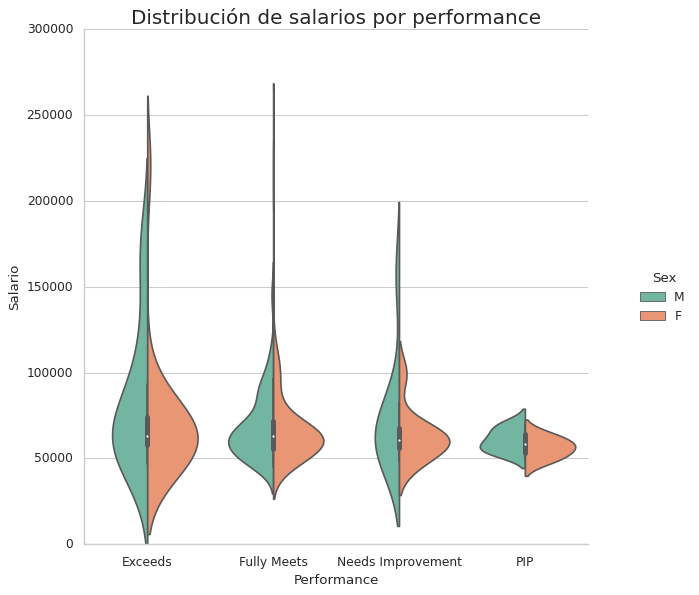

In [ ]:
#Realizar grafico de violin de salarios discriminados por genero
sns.set_theme(style="whitegrid")
ax=sns.catplot(data=df, kind='violin', x='PerformanceScore', y='Salary', hue='Sex',split=True, palette='Set2')
ax.set(xlabel='Performance', ylabel='Salario')
ax.set(ylim=(0, None))
plt.gcf().set_size_inches(10, 8)
plt.title('Distribución de salarios por performance').set_fontsize('18')

In [ ]:
#Graficar la serie de tiempo correspondiente a la fecha de contratacion (DateofHire)
df['DateofHire']=pd.to_datetime(df['DateofHire']).dt.year
empleados=df[['EmpID','DateofHire']].groupby(by='DateofHire').count()
empleados

,EmpID
DateofHire,
2006,1
2007,2
2008,3
2009,7
2010,9
2011,83
2012,45
2013,44
2014,60


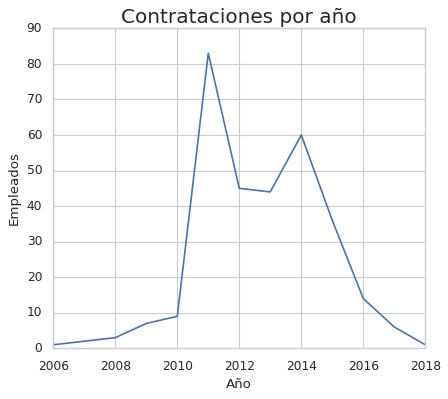

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize =(6, 5))
ax.ticklabel_format(style='plain', axis='both', useOffset=False)
ax= sns.lineplot(data=empleados, x=empleados.index, y=empleados['EmpID'])
ax.set(xlabel='Año', ylabel='Empleados')
plt.title('Contrataciones por año').set_fontsize('18')